<a href="https://colab.research.google.com/github/AndreaHernandez5072/CienciaDatos/blob/main/Laboratorio8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("heart.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#identificación de campos nulos
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


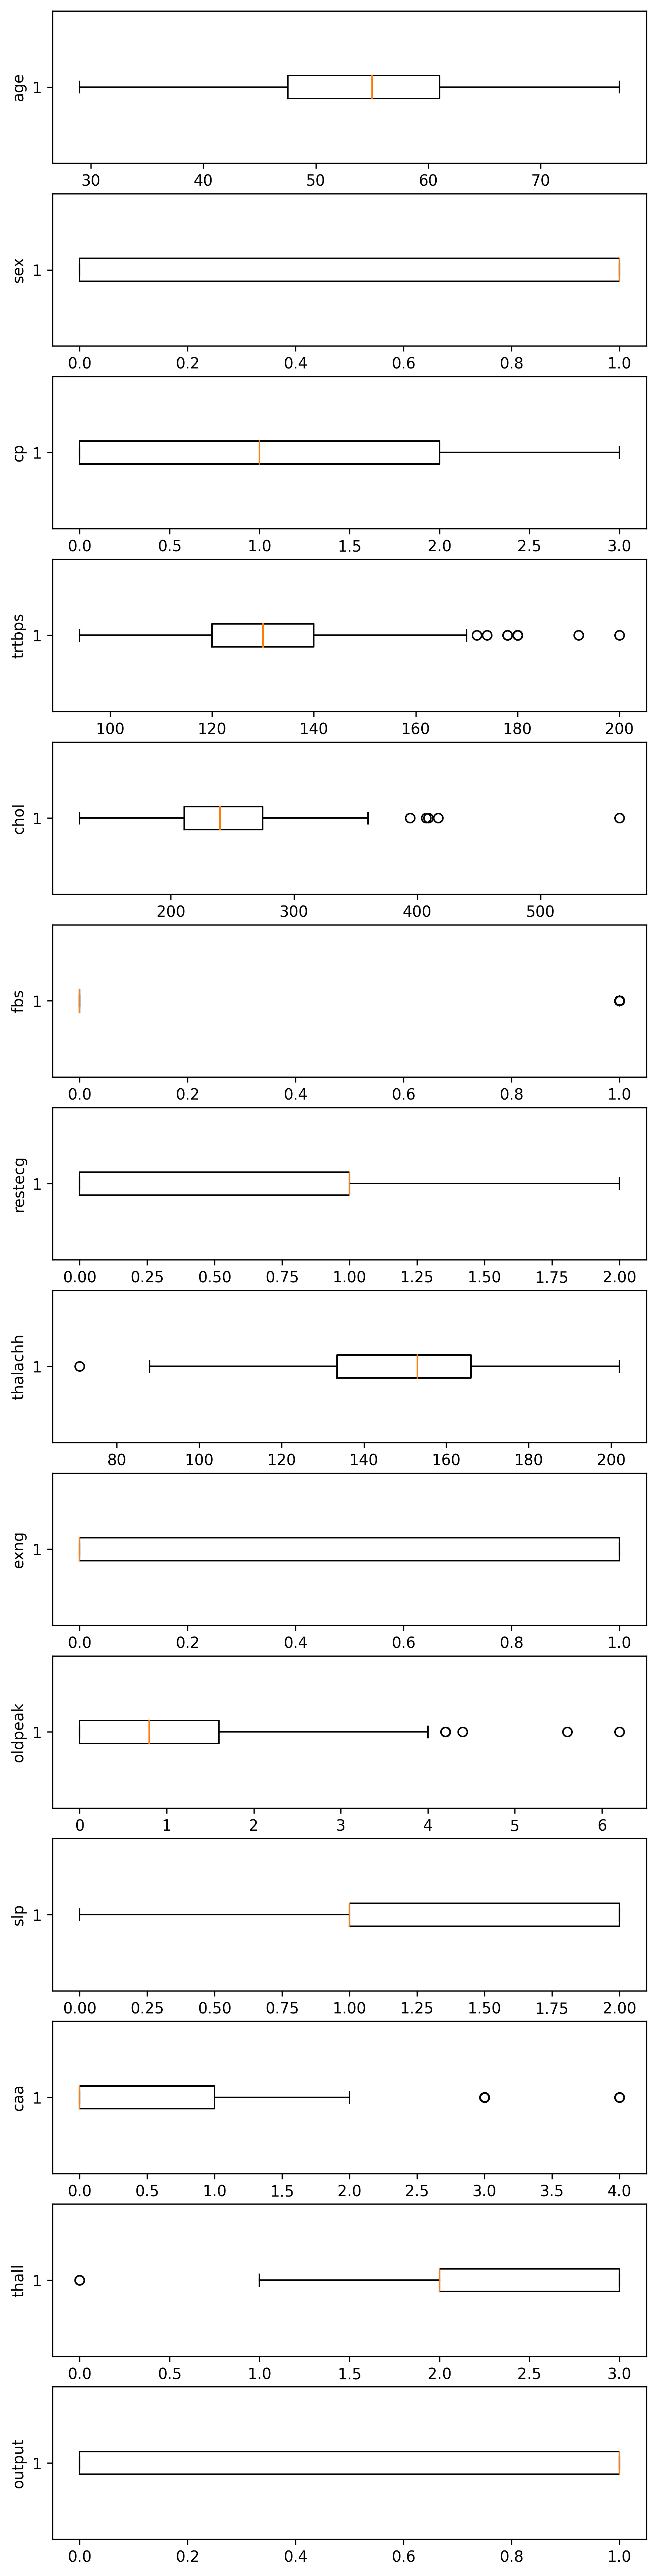

In [ ]:
#Detección de Outliers
def mostrarOutliers(dataset):
  fig,axs= plt.subplots(14,1,dpi=300,figsize=(7,30))
  i = 0
  for col in dataset.columns:
    axs[i].boxplot(df[col],vert=False)
    axs[i].set_ylabel(col)
    i+=1
  plt.show()

mostrarOutliers(df)

In [ ]:
def EliminaOutliers(col,dataset,cleandata):
  q1,q3 = np.percentile(dataset[col],[25,75])
  iqr=q3-q1
  limite_inferior=q1-(1.5*iqr)
  limite_superior=q3+(1.5*iqr)
  cleandata=dataset[(dataset[col]>=limite_inferior) & (dataset[col]<=limite_superior)]
  return cleandata

In [12]:
clean_data1 = df
clean_data1 = EliminaOutliers("age",df,clean_data1)
clean_data1 = EliminaOutliers("sex",clean_data1,clean_data1)
clean_data1 = EliminaOutliers("cp",clean_data1,clean_data1)
clean_data1 = EliminaOutliers("trtbps",clean_data1,clean_data1)
clean_data1 = EliminaOutliers("chol",clean_data1,clean_data1)
clean_data1 = EliminaOutliers("fbs",clean_data1,clean_data1)
clean_data1 = EliminaOutliers("restecg",clean_data1,clean_data1)
clean_data1 = EliminaOutliers("thalachh",clean_data1,clean_data1)
clean_data1 = EliminaOutliers("exng",clean_data1,clean_data1)
clean_data1 = EliminaOutliers("oldpeak",clean_data1,clean_data1)
clean_data1 = EliminaOutliers("slp",clean_data1,clean_data1)
clean_data1 = EliminaOutliers("caa",clean_data1,clean_data1)
clean_data1 = EliminaOutliers("thall",clean_data1,clean_data1)
clean_data1 = EliminaOutliers("output",clean_data1,clean_data1)
clean_data1.describe()
#Eliminan más de 25% de los datos, se decedira hacer un tratamiento de los datos por media

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.0,228.000000,228.000000,228.000000,228.000000,228.000000,228.00000,228.000000,228.000000
mean,53.333333,0.675439,0.942982,128.671053,242.372807,0.0,0.548246,151.070175,0.315789,0.946053,1.451754,0.47807,2.315789,0.578947
std,9.229016,0.469241,1.020190,15.349142,44.329827,0.0,0.516125,22.492963,0.465852,1.035422,0.587945,0.69893,0.560299,0.494814
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.0,0.000000,88.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
25%,45.000000,0.000000,0.000000,120.000000,209.750000,0.0,0.000000,137.500000,0.000000,0.000000,1.000000,0.00000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,239.000000,0.0,1.000000,155.000000,0.000000,0.600000,1.500000,0.00000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,269.250000,0.0,1.000000,168.250000,1.000000,1.600000,2.000000,1.00000,3.000000,1.000000
max,76.000000,1.000000,3.000000,170.000000,360.000000,0.0,2.000000,202.000000,1.000000,4.000000,2.000000,2.00000,3.000000,1.000000


<Axes: xlabel='output', ylabel='Count'>

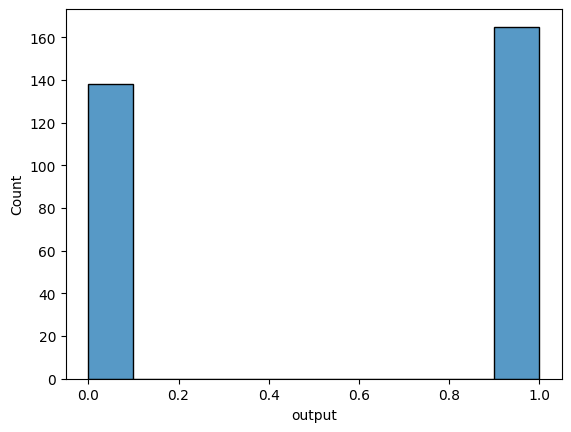

In [14]:
sns.histplot(df['output'])

In [16]:
#No hay nulos
#Identificar ceros en la distribución
print("Cantidad de ceros en age: ",df["age"].isin([0]).sum())
print("Cantidad de ceros en sex: ",df["sex"].isin([0]).sum())
print("Cantidad de ceros en cp: ",df["cp"].isin([0]).sum()) #variable describe cantidad de vasos
print("Cantidad de ceros en trtbps: ",df["trtbps"].isin([0]).sum())
print("Cantidad de ceros en chol: ",df["chol"].isin([0]).sum())
print("Cantidad de ceros en fbs: ",df["fbs"].isin([0]).sum())
print("Cantidad de ceros en restecg: ",df["restecg"].isin([0]).sum())
print("Cantidad de ceros en thalachh: ",df["thalachh"].isin([0]).sum())
print("Cantidad de ceros en exng: ",df["exng"].isin([0]).sum())
print("Cantidad de ceros en oldpeak: ",df["oldpeak"].isin([0]).sum())
print("Cantidad de ceros en slp: ",df["slp"].isin([0]).sum())
print("Cantidad de ceros en caa: ",df["caa"].isin([0]).sum())
print("Cantidad de ceros en thall: ",df["thall"].isin([0]).sum())
print("Cantidad de ceros en output: ",df["output"].isin([0]).sum())

Cantidad de ceros en age:  0
Cantidad de ceros en sex:  96
Cantidad de ceros en cp:  143
Cantidad de ceros en trtbps:  0
Cantidad de ceros en chol:  0
Cantidad de ceros en fbs:  258
Cantidad de ceros en restecg:  147
Cantidad de ceros en thalachh:  0
Cantidad de ceros en exng:  204
Cantidad de ceros en oldpeak:  99
Cantidad de ceros en slp:  21
Cantidad de ceros en caa:  175
Cantidad de ceros en thall:  2
Cantidad de ceros en output:  138
